In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import networkx as nx

In [23]:
df1 = pd.read_csv('D:/Data D/Data E/My Data/Modern/My Folder/Kurikulum Pribadi/Data Science/Project/Toronto Bikeshare Data/Data1718/Q1_2017.csv')
df2 = pd.read_csv('D:/Data D/Data E/My Data/Modern/My Folder/Kurikulum Pribadi/Data Science/Project/Toronto Bikeshare Data/Data1718/Q2_2017.csv')
df3 = pd.read_csv('D:/Data D/Data E/My Data/Modern/My Folder/Kurikulum Pribadi/Data Science/Project/Toronto Bikeshare Data/Data1718/Q3_2017.csv')
df4 = pd.read_csv('D:/Data D/Data E/My Data/Modern/My Folder/Kurikulum Pribadi/Data Science/Project/Toronto Bikeshare Data/Data1718/Q4_2017.csv')


In [24]:
df1['start'] = pd.to_datetime(df1['trip_start_time'], dayfirst=True)

In [25]:
df2['start'] = pd.to_datetime(df2['trip_start_time'], dayfirst=True)

In [26]:
df3['start'] = pd.to_datetime(df3['trip_start_time'], dayfirst=True)

In [27]:
df4['start'] = pd.to_datetime(df4['trip_start_time'], dayfirst=True)

In [28]:
df = df1.copy()
df = df.append([df2, df3, df4], sort=False)
df = df.copy()

In [29]:
df['hour'] = df['start'].dt.hour.values
df['week'] = df['start'].dt.week.values
df['day'] = df['start'].dt.day.values
df['weekday'] = df['start'].dt.day_name()
df.index = df.start.dt.date.values
df.index.name = 'index'
df['counter'] = 1

#### 2017 Bike Sharing Analysis

In [30]:
df2017 = df.copy()

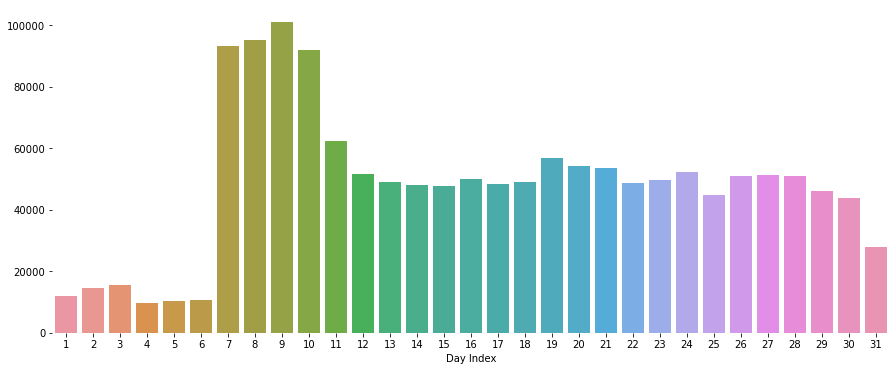

In [35]:
daily = df2017.day.value_counts().sort_index()

plt.figure(figsize=(15,6))
sns.barplot(x=daily.index, y=daily.values)
plt.box(on=None)
plt.xticks(daily.index-1);
plt.xlabel('Day Index');

In [36]:
'The busiest Date of the year are {}'.format(list(daily.sort_values(ascending=False)[:5].index.values))

'The busiest Date of the year are [9, 8, 7, 10, 11]'

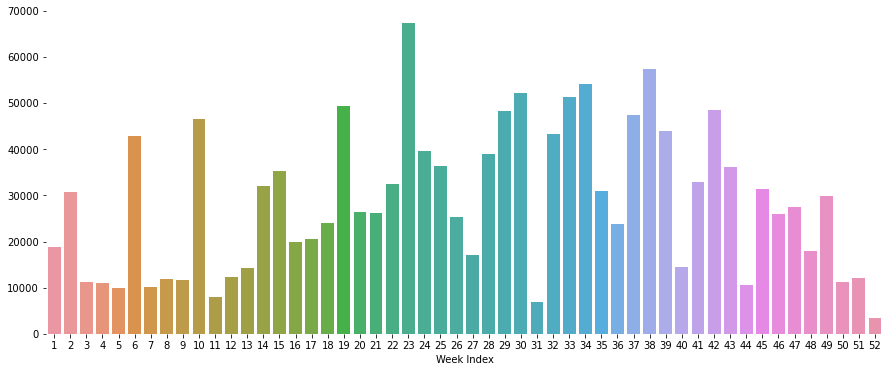

In [37]:
week = df2017.week.value_counts().sort_index()

plt.figure(figsize=(15,6))
sns.barplot(x=week.index, y=week.values)
plt.box(on=None)
plt.xticks(week.index-1);
plt.xlabel('Week Index');

In [38]:
'The busiest Week of the year are {}'.format(list(week.sort_values(ascending=False)[:5].index.values))

'The busiest Week of the year are [23, 38, 34, 30, 33]'

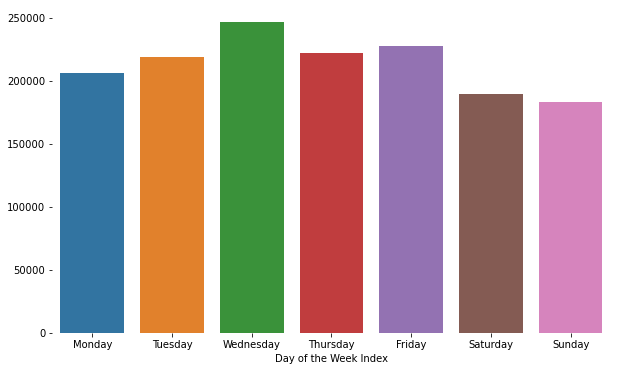

In [39]:
weekday = df2017.weekday.value_counts(ascending=True)

plt.figure(figsize=(10,6))
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday.index, y=weekday.values, order=order)
plt.box(on=None)
plt.xlabel('Day of the Week Index');

In [40]:
print('The busiest day of the year is ', list(weekday.sort_values()[:3].index))

The busiest day of the year is  ['Sunday', 'Saturday', 'Monday']


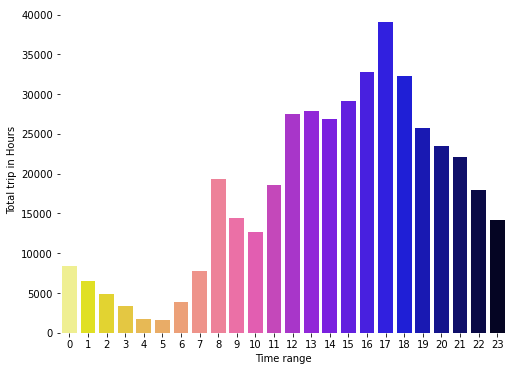

In [41]:
period = df2017.groupby('hour').sum()

plt.figure(figsize=(8,6))
sns.barplot(x=period.index, y=period.trip_duration_seconds.values/3600, palette='gnuplot2_r')
plt.box(on=None)
plt.xlabel('Time range');
plt.ylabel('Total trip in Hours');

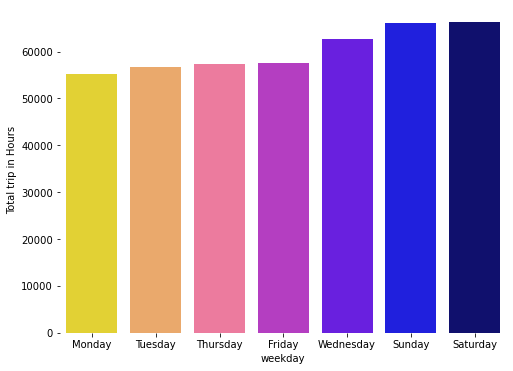

In [42]:
weekday = df2017.groupby('weekday').sum().sort_values('trip_duration_seconds')

plt.figure(figsize=(8,6))
sns.barplot(x=weekday.index, y=weekday.trip_duration_seconds.values/3600, palette='gnuplot2_r')
plt.box(on=None)
plt.ylabel('Total trip in Hours');

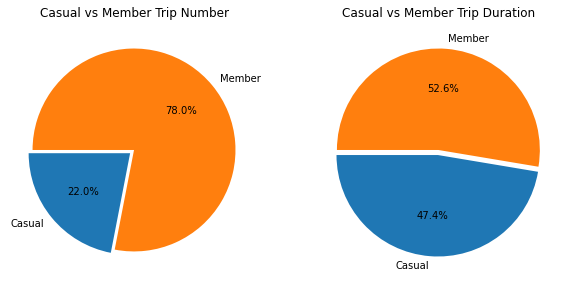

In [43]:
user = df2017.groupby(['user_type']).sum()

plt.figure(figsize=(10,10));
plt.subplot(1,2,1)
plt.pie(user.counter.values, startangle=180, labels=user.index, autopct='%.1f%%', explode=(.05,0));
plt.title('Casual vs Member Trip Number');
plt.xlabel
plt.subplot(1,2,2)
plt.pie(user.trip_duration_seconds.values, startangle=180, labels=user.index, autopct='%.1f%%', explode=(.05,0));
plt.title('Casual vs Member Trip Duration');

Member user are generating 78% of total number of trip but only contribute 52.6% of total duration of the trip.

on the other hand, Casual user only generate 22% of the trip number, but account for 47.4% of the total trip's duration